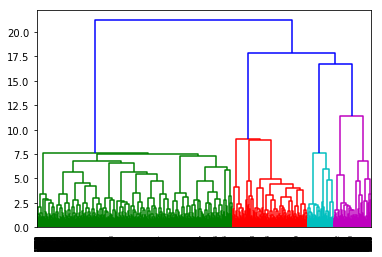

In [64]:
#プロセスから結果の分類
import numpy as np
import mysql.connector
import scipy.signal as signal
from matplotlib.pyplot import show
import matplotlib.pyplot as plt
import scipy
import scipy.spatial.distance as distance
from scipy.cluster.hierarchy import linkage, dendrogram, ward,cut_tree
from random import random
import math
#np.set_printoptions(threshold=np.inf)

connector = mysql.connector.connect(host='localhost',db='agent_analysis',user='root',password='admin')
cursor = connector.cursor(buffered=True)

sql = "SELECT result_soc_t1,result_soc_t2,result_soc_t3,result_soc_t4,result_soc_t5,result_org_t1,result_org_t2,result_org_t3,result_org_t4,result_org_t5 FROM hand_simu_logs"

sql = "SELECT * FROM hand_simu_logs"



num=cursor.execute(sql)
data_base = np.array(cursor.fetchall())
data = np.concatenate((data_base[:,20:45], data_base[:,65:90],data_base[:,110:135]), axis=1).astype(np.double)

cursor.close()
connector.close()

#dArray1 = distance.pdist(data, metric = 'chebyshev')
#print(dArray1)
result1 = linkage(data, method='ward')
dendrogram(result1)
show()

[[ 1 17]
 [ 1 17]
 [ 1 17]
 [ 1 17]
 [ 1 17]
 [ 1 17]]


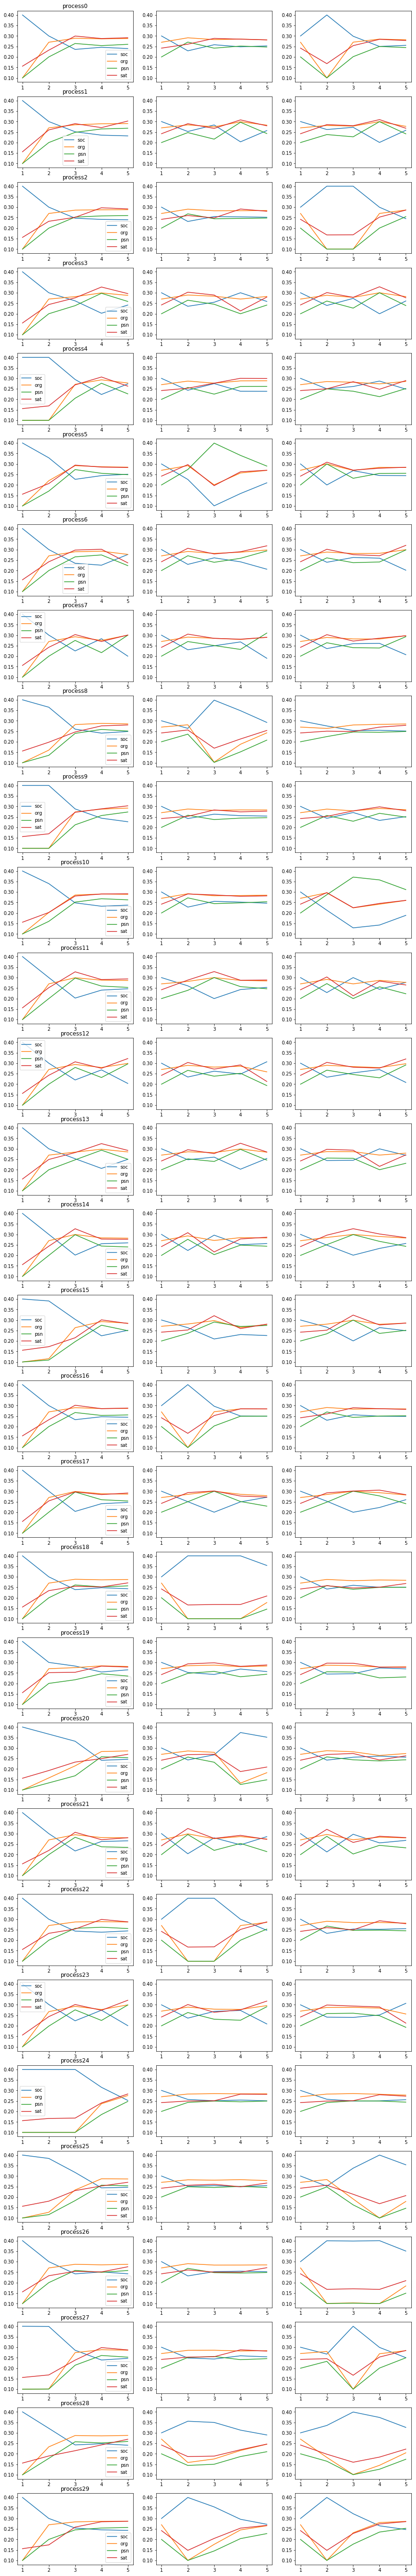

In [65]:
div_n1 = 30

joint =  np.concatenate((data, cut_tree(result1, div_n1)), axis=1)

#check_d = np.concatenate((check, cut_tree(result1, div_n1)), axis=1).astype(np.int64)
print(check_d[check_d[:,0]==1])




plt.clf()
plt.figure(figsize=(15, 10*math.ceil(div_n1/2)))


for n in range(div_n1):
    joint_d = joint[joint[:,75]==n]
    plt.subplot(3*math.ceil(div_n1/2), 3, 3*n+1)
    plt.plot(range(1,6),np.average(joint_d, axis=0)[0:5],label='soc')
    plt.plot(range(1,6),np.average(joint_d, axis=0)[5:10],label='org')
    plt.plot(range(1,6),np.average(joint_d, axis=0)[10:15],label='psn')
    plt.plot(range(1,6),np.average(joint_d, axis=0)[15:20],label='sat')
    plt.title("process" + str(n))
    plt.ylim(0.08,0.42)
    plt.legend()

    plt.subplot(3*math.ceil(div_n1/2), 3, 3*n+2)
    plt.plot(range(1,6),np.average(joint_d, axis=0)[25:30])
    plt.plot(range(1,6),np.average(joint_d, axis=0)[30:35])
    plt.plot(range(1,6),np.average(joint_d, axis=0)[35:40])
    plt.plot(range(1,6),np.average(joint_d, axis=0)[40:45])
    plt.ylim(0.08,0.42)
    
    plt.subplot(3*math.ceil(div_n1/2), 3, 3*n+3)
    plt.plot(range(1,6),np.average(joint_d, axis=0)[50:55])
    plt.plot(range(1,6),np.average(joint_d, axis=0)[55:60])
    plt.plot(range(1,6),np.average(joint_d, axis=0)[60:65])
    plt.plot(range(1,6),np.average(joint_d, axis=0)[65:70])
    plt.ylim(0.08,0.42)
    
    plt.xticks([1,2,3,4,5])
plt.show()

[[ 1 17]
 [ 1 17]
 [ 1 17]
 [ 1 17]
 [ 1 17]
 [ 1 17]]
0
624


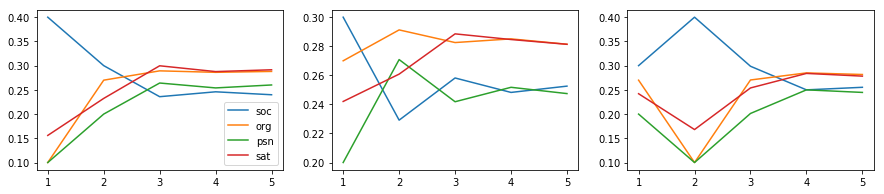

In [82]:
div_n1 = 30

joint =  np.concatenate((data, cut_tree(result1, div_n1)), axis=1)

check_d = np.concatenate((data_base[:,145:146], cut_tree(result1, div_n1)), axis=1).astype(np.int64)
print(check_d[check_d[:,0]==1])

n=check_d[check_d[:,0]==1][0,1]

print(n)

plt.clf()
plt.figure(figsize=(15, 10))



joint_d = joint[joint[:,75]==n]
print(len(joint_d))
plt.subplot(3, 3, 1)
plt.plot(range(1,6),np.average(joint_d, axis=0)[0:5],label='soc')
plt.plot(range(1,6),np.average(joint_d, axis=0)[5:10],label='org')
plt.plot(range(1,6),np.average(joint_d, axis=0)[10:15],label='psn')
plt.plot(range(1,6),np.average(joint_d, axis=0)[15:20],label='sat')
plt.legend()

plt.subplot(3, 3, 2)
plt.plot(range(1,6),np.average(joint_d, axis=0)[25:30])
plt.plot(range(1,6),np.average(joint_d, axis=0)[30:35])
plt.plot(range(1,6),np.average(joint_d, axis=0)[35:40])
plt.plot(range(1,6),np.average(joint_d, axis=0)[40:45])
    
plt.subplot(3, 3, 3)
plt.plot(range(1,6),np.average(joint_d, axis=0)[50:55])
plt.plot(range(1,6),np.average(joint_d, axis=0)[55:60])
plt.plot(range(1,6),np.average(joint_d, axis=0)[60:65])
plt.plot(range(1,6),np.average(joint_d, axis=0)[65:70])
    
plt.xticks([1,2,3,4,5])
plt.show()

In [ ]:
target_process = 24

#特定結果の全員の分類
data2 = data_base[:,135:145].astype(np.double)
data2 = np.concatenate((data2, cut_tree(result1, div_n1)), axis=1)
data2 = data2[data2[:,10]==target_process].astype(np.double)

#意思決定可視化のための抽出
data_act = np.concatenate((data_base[:,15:20], data_base[:,60:65],data_base[:,105:110]), axis=1).astype(np.str)
data_act = np.concatenate((data_act, cut_tree(result1, div_n1)), axis=1)
data_act = data_act[data_act[:,15]==str(target_process)]

result3 = linkage(data2, method='ward')
dendrogram(result3)
dendrogram(result3)
show()

check2 = check_d[check_d[:,1]==target_process]

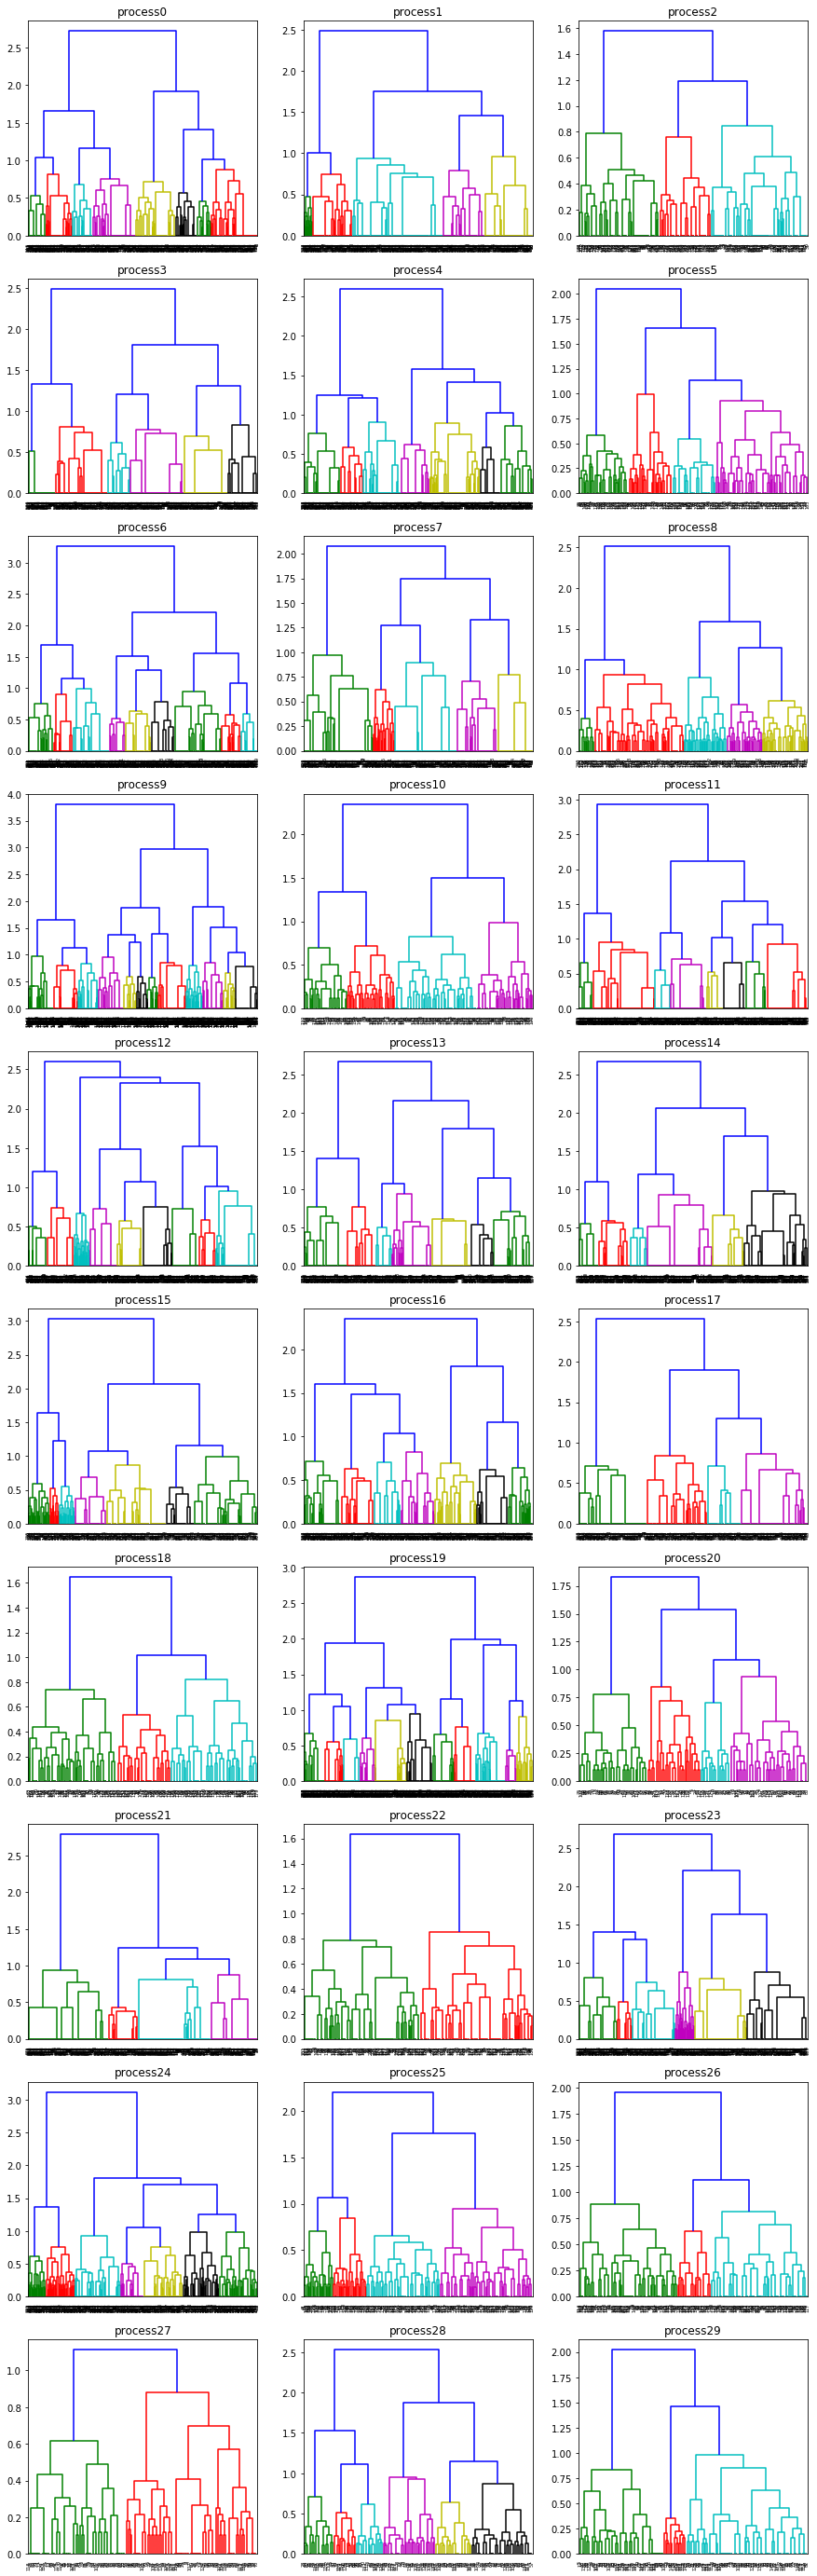

In [68]:

plt.clf()
plt.figure(figsize=(15, math.ceil(div_n1/3)*5))

for n in range(div_n1):

    #特定結果の全員の分類
    data2 = data_base[:,135:145].astype(np.double)
    data2 = np.concatenate((data2, cut_tree(result1, div_n1)), axis=1)
    data2 = data2[data2[:,10]==n].astype(np.double)
    result3 = linkage(data2, method='ward')

    plt.subplot(math.ceil(div_n1/3),3,n+1)
    plt.title("process" + str(n))
    dendrogram(result3,color_threshold=1.0)



show()


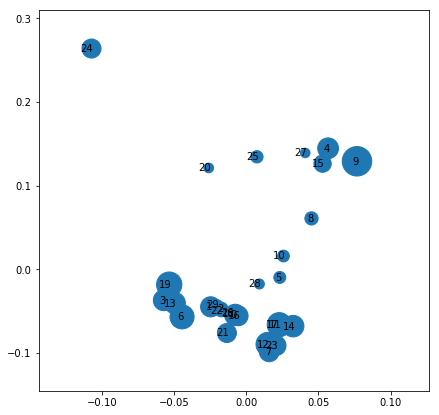

     , 0.02, 0.01, 0.05, 0.21, 0.06, 0.04, 0.06, 0.13, 0.21, 0.08, 0.04, 0.05, 0.05, 0.04, 0.19, 0.01, 0.03, 0.01, 0.06, 0.18, 0.04, 0.01, 0.05, 0.33, 0.19, 0.01, 0.20, 0.04, 0.02,
     ,     , 0.01, 0.04, 0.21, 0.07, 0.05, 0.07, 0.13, 0.20, 0.08, 0.05, 0.06, 0.04, 0.06, 0.19, 0.03, 0.05, 0.02, 0.05, 0.17, 0.06, 0.02, 0.06, 0.32, 0.19, 0.02, 0.20, 0.05, 0.02,
     ,     ,     , 0.04, 0.21, 0.06, 0.04, 0.06, 0.13, 0.20, 0.08, 0.05, 0.06, 0.04, 0.05, 0.19, 0.02, 0.05, 0.01, 0.05, 0.17, 0.05, 0.01, 0.06, 0.32, 0.19, 0.01, 0.20, 0.04, 0.01,
     ,     ,     ,     , 0.20, 0.08, 0.05, 0.10, 0.13, 0.20, 0.09, 0.07, 0.09, 0.01, 0.09, 0.19, 0.06, 0.07, 0.05, 0.06, 0.17, 0.08, 0.04, 0.09, 0.33, 0.19, 0.05, 0.20, 0.07, 0.05,
     ,     ,     ,     ,     , 0.16, 0.21, 0.23, 0.08, 0.05, 0.13, 0.22, 0.23, 0.20, 0.22, 0.03, 0.21, 0.22, 0.21, 0.20, 0.10, 0.22, 0.21, 0.23, 0.23, 0.06, 0.21, 0.03, 0.17, 0.21,
     ,     ,     ,     ,     ,     , 0.07, 0.09, 0.08, 0.16, 0.04, 0.06, 0.08, 0.08, 0.07, 0.15

In [79]:
from sklearn import manifold

data_ave = []
mark_size = []
for n in range(div_n1):
    joint_d = joint[joint[:,75]==n]
    data_ave.append(np.average(joint_d, axis=0)[:10])
    mark_size.append(10000*(len(joint_d)/len(joint)))
    
dist_m = distance.pdist(data_ave)


mds = manifold.MDS(n_components=2, dissimilarity="euclidean", random_state=10)

pos = mds.fit_transform(data_ave)

plt.clf()
plt.figure(figsize=(7, 7))
plt.scatter(pos[:, 0], pos[:, 1],s=mark_size, marker = 'o')
 
for label, x, y in zip(range(div_n1), pos[:, 0], pos[:, 1]):
    plt.annotate(
        label,
        xy = (x, y), xytext = (2, -5),
        textcoords = 'offset points', ha = 'right', va = 'bottom')
 
plt.show()

count = 0
for n in range(div_n1):
    for m in range(n+1):
        print('     ,', end='')
        
    for l in range(div_n1-n-1):
        print(" " + str(('%03.2f' % dist_m[count]))+',',end='')
        count = count+1
        
    print('')

In [81]:
len(joint[0])

76